# An introduction to the drawdsd library

In [1]:
from drawdsd.iosetup import set_domain_colors, draw_complex
from drawdsd.drawdsd import get_default_plot_params

## First, use the dsdobjects libary for complex specification
Note: When working with dsdobjects, certain properties of domains and complexes are immutable. For example, it is not possible to change the length of a domain, or the name of a complex further down in this notebook. You would have to restart the kernel and make sure that the initial definition matches all following uses.

In [2]:
from dsdobjects.objectio import set_io_objects, read_pil, read_pil_line

In [3]:
# Input for drawing
pil = """
length x = 10
length b = 10
length t = 5

F1 = x( t( b + ) ) t*
F2 = x( t( b ) ) t*
"""

In [4]:
set_io_objects()
info = read_pil(pil)
domains = info['domains']
complexes = info['complexes']
display(domains)
display(complexes)

{'x': DomainS(x, 10),
 'x*': DomainS(x*, 10),
 'b': DomainS(b, 10),
 'b*': DomainS(b*, 10),
 't': DomainS(t, 5),
 't*': DomainS(t*, 5)}

{'F1': ComplexS(F1, x( t( b + ) ) t*), 'F2': ComplexS(F2, x( t( b ) ) t*)}

## Second, we add the color property to all domains. 
Note: you can also set colors manually, but here we use the convenience function *set_domain_colors* which assigns 

In [5]:
set_domain_colors(domains)
for n, d in domains.items():
    print(f'{d.name = }:\t{d.color = }')

d.name = 'x':	d.color = 'rgb(147, 117, 239)'
d.name = 'x*':	d.color = 'rgb(147, 117, 239)'
d.name = 'b':	d.color = 'rgb(239, 221, 117)'
d.name = 'b*':	d.color = 'rgb(239, 221, 117)'
d.name = 't':	d.color = 'rgb(117, 239, 184)'
d.name = 't*':	d.color = 'rgb(117, 239, 184)'


## Third, let's draw all complexes with default rendering


Drawing complex: F1


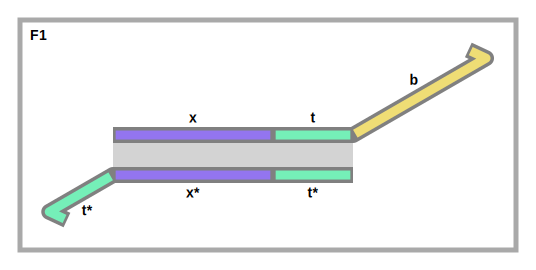

Drawing complex: F2


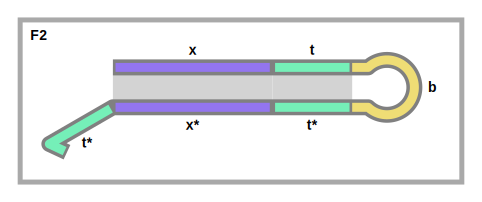

In [6]:
for n, c in complexes.items():
    print(f'Drawing complex: {n}')
    stable = list(c.strand_table)
    ptable = list(c.pair_table)
    svg = draw_complex(stable, ptable, name = n)
    svg.save_png(f'complex_{n}.png')
    display(svg)


## Let's add sequences to domains.
Note: The sequence is not immutable for domain objects, so as long as name and length match, we can update the sequences of domain objects.


In [7]:
pil = """
sequence x = GGGGGGGGGG: 10
sequence b = AAAAAAAAAA: 10
sequence t = GCTGT: 5

F1 = x( t( b + ) ) t*
F2 = x( t( b ) ) t*
"""
set_io_objects()
info = read_pil(pil)
domains = info['domains']
complexes = info['complexes']

Drawing complex: F1


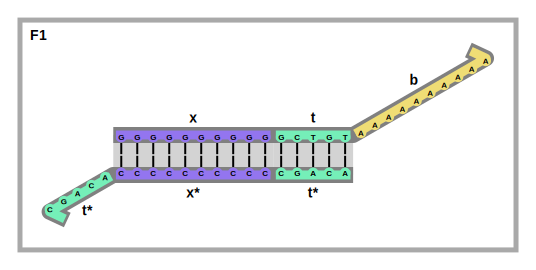

Drawing complex: F2


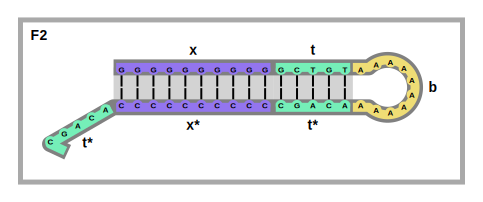

In [8]:
for n, c in complexes.items():
    print(f'Drawing complex: {n}')
    stable = list(c.strand_table)
    ptable = list(c.pair_table)
    svg = draw_complex(stable, ptable, name = n)
    svg.save_png(f'complex_{n}.png')
    display(svg)

# Now some more complicated examples

In [9]:
# Again, the dsdobjects part for complex initialization (This needs to be consistent with all previous parts of this notebook!)
pil = """
sequence a = ACGTAAATTT: 10
sequence b = AAGGCCTTAA: 10
sequence c = GGCCGGCCAA: 10
sequence t1 = GCTGT: 5
sequence t2 = TCCGT: 5
sequence s1 = TTTT: 4
sequence s2 = TTTT: 4
sequence x = GGGGGGGGGG: 10
sequence y = CCCGGGGGCC: 10

T1 = t1 a( s1 a*( ) s2 a( + ) s1 a*( x ) s2 ) t2
"""
set_io_objects()
info = read_pil(pil)
domains = info['domains']
complexes = info['complexes']
set_domain_colors(domains)

Drawing complex: T1


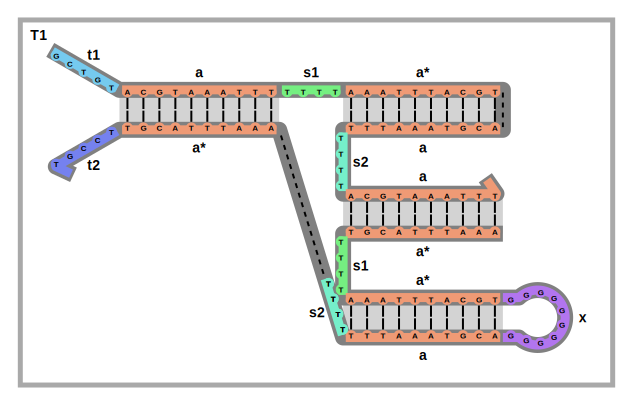

In [10]:
# Drawing a single complex T1
cplx = complexes['T1']
print(f'Drawing complex: {cplx.name}')
stable = list(cplx.strand_table)
ptable = list(cplx.pair_table)
svg = draw_complex(stable, ptable, name = cplx.name)
display(svg)

In [11]:
pa, ll, la = get_default_plot_params(stable, ptable)
print(f'pa = {pa}')
print(f'll = {ll}')
print(f'la = {la}')


pa = [0, 0, 0, 0]
ll = [[5, 4, 0, 4, 0], [0, 4, 10, 4, 5]]
la = [[None, None, None, None, None], [None, None, None, None, None]]


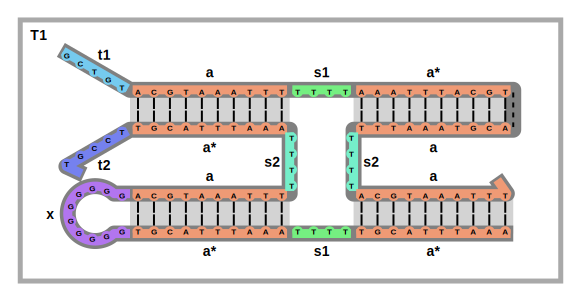

In [12]:
pa = [0, 0, 0, 180]
ll = [[5, 4, 0, 4, 0], [0, 4, 10, 4, 5]]
la = [[None, None, None, None, None], [None, None, None, None, None]]
draw_complex(stable, ptable, name = cplx.name, pair_angles = pa)

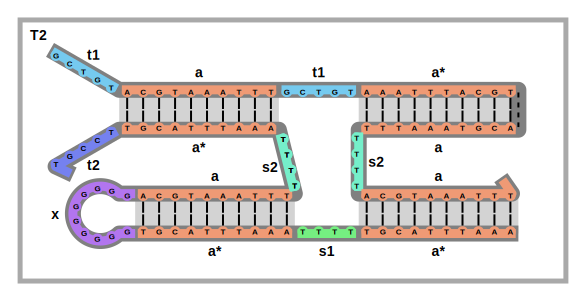

In [13]:
cplx = read_pil_line('T2 = t1 a( t1 a*( ) s2 a( + ) s1 a*( x ) s2 ) t2')
stable = list(cplx.strand_table)
ptable = list(cplx.pair_table)
draw_complex(stable, ptable, name = cplx.name, pair_angles = pa)

In [14]:
pa, ll, la = get_default_plot_params(stable, ptable)
print(f'pa = {pa}')
print(f'll = {ll}')
print(f'la = {la}')

pa = [0, 0, 0, 0]
ll = [[5, 5, 0, 4, 0], [0, 4, 10, 4, 5]]
la = [[None, None, None, None, None], [None, None, None, None, None]]


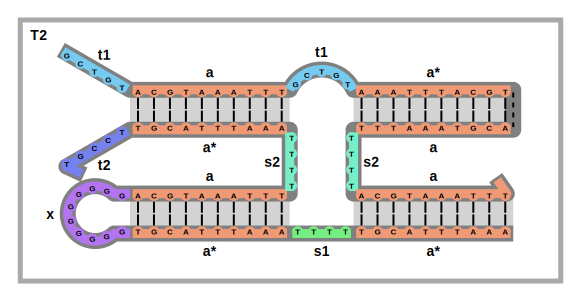

In [15]:
pa = [0, 0, 0, 180]
ll = [[5, 4, 0, 4, 0], [0, 4, 10, 4, 5]]
la = [[None, None, None, None, None], [None, None, None, None, None]]
draw_complex(stable, ptable, name = cplx.name, pair_angles = pa, loop_lengths = ll)

# Workbench

In [17]:
# Again, the dsdobjects part for complex initialization (This needs to be consistent with all previous parts of this notebook!)
pil = """
sequence a = ACGTAAATTT: 10
sequence b = AAGGCCTTAA: 10
sequence c = GGCCGGCCAA: 10
sequence t1 = GCTGT: 5
sequence t2 = TCCGT: 5
sequence s1 = TTTT: 4
sequence s2 = TTTT: 4
sequence x = GGGGGGGGGG: 10
sequence y = CCCGGGGGCC: 10
sequence i = N: 1
"""
set_io_objects()
info = read_pil(pil)
domains = info['domains']
complexes = info['complexes']
set_domain_colors(domains)

In [73]:
# If you change this, make sure you change both name *and* structure!
cplx = read_pil_line('T55 = t1 a( i b( t1 a*( ) s2 a( i a( ) + ) s1 a*( x ) s2 ) ) t2')
stable = list(cplx.strand_table)
ptable = list(cplx.pair_table)
pa, ll, la = get_default_plot_params(stable, ptable)
print(f'pa = {pa}')
print(f'll = {ll}')
print(f'la = {la}')

pa = [0, 0, 0, 0, 0, 0]
ll = [[5, 1, 5, 0, 4, 1, 0, 0], [0, 4, 10, 4, 0, 5]]
la = [[None, None, None, None, None, None, None, None], [None, None, None, None, None, None]]


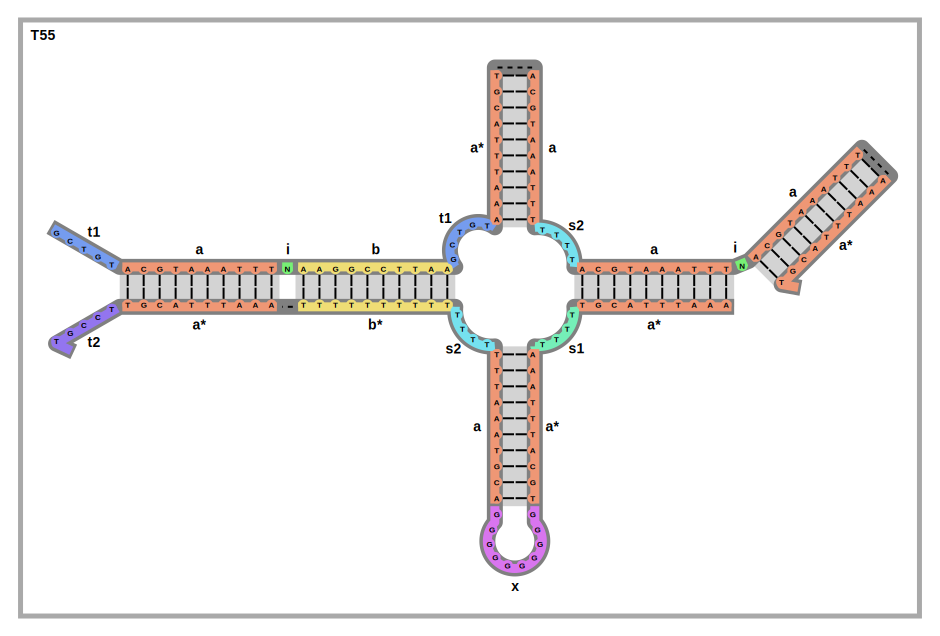

In [74]:
pa = [0, 0, 90, 0, 45, -90]
ll = [[5, 1, 3.5, 0, 3.5, 1, 0, 0], [0, 3.5, 10, 3.5, 0, 5]]
la = [[None, None, 45, None, -45, None, None, None], [None, None, None, None, None, None]]
draw_complex(stable, ptable, name = cplx.name, pair_angles = pa, loop_lengths = ll, loop_angles = la)